In [1]:
import arviz as az
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.lines import Line2D
style.use('plotting.mplstyle')
import numpy as np
import json
from scipy.stats import gaussian_kde

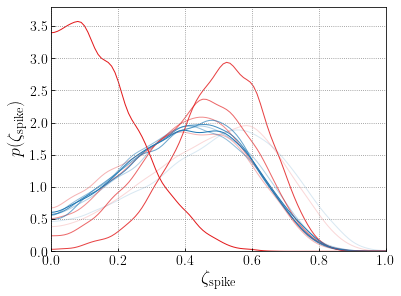

In [12]:
# Prepare figure
fig,ax = plt.subplots(figsize=(6,4.5))
grid = np.linspace(0,1,100)

# Loop across different presumed spike widths
eps_values = [0.03,0.01,0.003,0.001,0.0003,0.0001]
for i,eps in enumerate(eps_values):
    
    # Read in inference data from run with KDE'd likelihood
    kde_file = '../data/kde_vs_monteCarlo_comparisons/effective_spin_gaussian_spike_kde_eps_{0:.4f}.cdf'.format(eps)
    data_kdeLikelihood = az.from_netcdf(kde_file)
    
    # Read in inference data from run with ordinary monte carlo averaged likelihood
    mc_file = '../data/kde_vs_monteCarlo_comparisons/effective_spin_gaussian_spike_mc_eps_{0:.4f}.cdf'.format(eps)
    data_mcLikelihood = az.from_netcdf(mc_file)
    
    # Form KDEs over results
    zetas_kdeLikelihood = data_kdeLikelihood.posterior.stack(draws=("chain", "draw")).zeta_spike.values
    kde_zetas_kdeLikelihood = gaussian_kde(zetas_kdeLikelihood,bw_method='scott')
    
    zetas_mcLikelihood = data_mcLikelihood.posterior.stack(draws=("chain", "draw")).zeta_spike.values
    kde_zetas_mcLikelihood = gaussian_kde(zetas_mcLikelihood,bw_method='scott')
    
    ax.plot(grid,kde_zetas_kdeLikelihood(grid) + kde_zetas_kdeLikelihood(2.-grid) + kde_zetas_kdeLikelihood(-grid),
            color='#1f78b4',alpha=(i+1)/6.,lw=1,zorder=0)
    ax.plot(grid,kde_zetas_mcLikelihood(grid) + kde_zetas_mcLikelihood(2.-grid) + kde_zetas_mcLikelihood(-grid),
            color='#e31a1c',alpha=(i+1)/6.,lw=1,zorder=0)
    
ax.set_xlim(0,1)
ax.set_ylim(0,3.8)
ax.set_xlabel(r'$\zeta_\mathrm{spike}$')
ax.set_ylabel(r'$p(\zeta_\mathrm{spike})$')
plt.show()

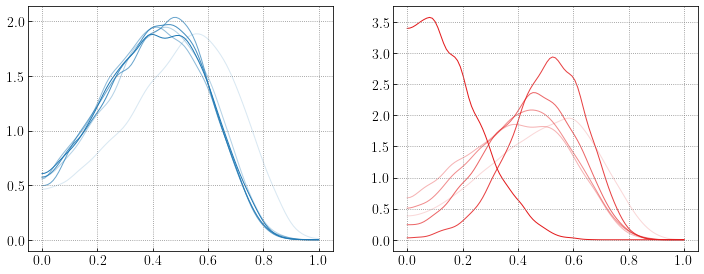

In [13]:
# Prepare figure
fig = plt.figure(figsize=(12,4.5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
grid = np.linspace(0,1,100)

# Loop across different presumed spike widths
eps_values = [0.03,0.01,0.003,0.001,0.0003,0.0001]
for i,eps in enumerate(eps_values):
    
    # Read in inference data from run with KDE'd likelihood
    kde_file = '../data/kde_vs_monteCarlo_comparisons/effective_spin_gaussian_spike_kde_eps_{0:.4f}.cdf'.format(eps)
    data_kdeLikelihood = az.from_netcdf(kde_file)
    
    # Read in inference data from run with ordinary monte carlo averaged likelihood
    mc_file = '../data/kde_vs_monteCarlo_comparisons/effective_spin_gaussian_spike_mc_eps_{0:.4f}.cdf'.format(eps)
    data_mcLikelihood = az.from_netcdf(mc_file)
    
    # Form KDEs over results
    zetas_kdeLikelihood = data_kdeLikelihood.posterior.stack(draws=("chain", "draw")).zeta_spike.values
    kde_zetas_kdeLikelihood = gaussian_kde(zetas_kdeLikelihood,bw_method='scott')
    
    zetas_mcLikelihood = data_mcLikelihood.posterior.stack(draws=("chain", "draw")).zeta_spike.values
    kde_zetas_mcLikelihood = gaussian_kde(zetas_mcLikelihood,bw_method='scott')
    
    ax1.plot(grid,kde_zetas_kdeLikelihood(grid) + kde_zetas_kdeLikelihood(2.-grid) + kde_zetas_kdeLikelihood(-grid),
            color='#1f78b4',alpha=(i+1)/6.,lw=1,zorder=0)
    ax2.plot(grid,kde_zetas_mcLikelihood(grid) + kde_zetas_mcLikelihood(2.-grid) + kde_zetas_mcLikelihood(-grid),
            color='#e31a1c',alpha=(i+1)/6.,lw=1,zorder=0)
    
ax.set_xlim(0,1)
ax.set_ylim(0,3.8)
ax.set_xlabel(r'$\zeta_\mathrm{spike}$')
ax.set_ylabel(r'$p(\zeta_\mathrm{spike})$')
plt.show()

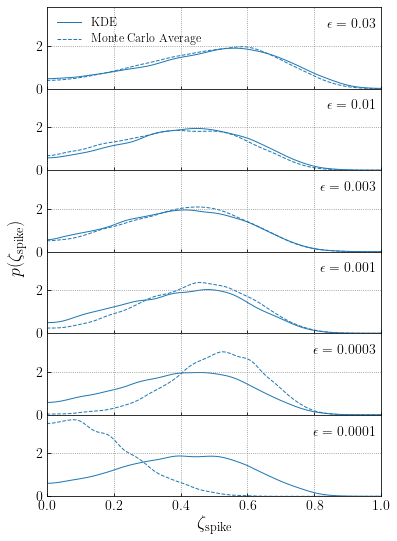

In [49]:
# Prepare figure
fig = plt.figure(figsize=(6,9))
grid = np.linspace(0,1,100)

# Loop across different presumed spike widths
eps_values = [0.03,0.01,0.003,0.001,0.0003,0.0001]
for i,eps in enumerate(eps_values):
    
    ax = fig.add_subplot(6,1,i+1)
    
    # Read in inference data from run with KDE'd likelihood
    kde_file = '../data/kde_vs_monteCarlo_comparisons/effective_spin_gaussian_spike_kde_eps_{0:.4f}.cdf'.format(eps)
    data_kdeLikelihood = az.from_netcdf(kde_file)
    
    # Read in inference data from run with ordinary monte carlo averaged likelihood
    mc_file = '../data/kde_vs_monteCarlo_comparisons/effective_spin_gaussian_spike_mc_eps_{0:.4f}.cdf'.format(eps)
    data_mcLikelihood = az.from_netcdf(mc_file)
    
    # Form KDEs over results
    zetas_kdeLikelihood = data_kdeLikelihood.posterior.stack(draws=("chain", "draw")).zeta_spike.values
    kde_zetas_kdeLikelihood = gaussian_kde(zetas_kdeLikelihood,bw_method='scott')
    
    zetas_mcLikelihood = data_mcLikelihood.posterior.stack(draws=("chain", "draw")).zeta_spike.values
    kde_zetas_mcLikelihood = gaussian_kde(zetas_mcLikelihood,bw_method='scott')
    
    ax.plot(grid,kde_zetas_kdeLikelihood(grid) + kde_zetas_kdeLikelihood(2.-grid) + kde_zetas_kdeLikelihood(-grid),
            color='#1f78b4',lw=1,zorder=0,label='KDE')
    ax.plot(grid,kde_zetas_mcLikelihood(grid) + kde_zetas_mcLikelihood(2.-grid) + kde_zetas_mcLikelihood(-grid),
            color='#1f78b4',lw=1,ls='--',zorder=0,label='Monte Carlo Average')
    
    ax.text(0.98,3,r'$\epsilon = {0}$'.format(eps),{'ha': 'right', 'va': 'center'},fontsize=14)
    
    if i+1==1:
        ax.legend(loc='upper left',frameon=False,fontsize=12)
    if i+1!=6:
        ax.set_xticklabels([])
    if i+1==6:
        ax.set_xlabel(r'$\zeta_\mathrm{spike}$',fontsize=18)
        ax.text(-0.09, 11.5, r'$p(\zeta_\mathrm{spike})$', {'ha': 'center', 'va': 'center'}, rotation=90,fontsize=18)
        
    ax.set_xlim(0,1)
    ax.set_ylim(0,3.8)

ax.set_xlabel(r'$\zeta_\mathrm{spike}$')

plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig('figure_10.pdf',bbox_inches='tight')
plt.show()